In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
n = 40
plt.rcParams['figure.dpi'] = 300

In [20]:
df_list = [None] * n
for i in range(1,n):
    fnm = f'./EWrun/CopiedResults/thput_exp{i+1}.csv'
    #fnm = f'./VM_runs/CopiedResults/cpu_exp{i+1}.csv'
    df_list[i] = pd.read_csv(fnm)
#print(df_list)
df_ew = pd.concat(df_list, ignore_index= True)

print(df_ew)

       rep     run_t  avg_speed  train_ctr
0        0  0.101602  47.920857          7
1        1  0.005745  47.481527          8
2        2  0.004155  45.711054         12
3        3  0.003554  46.596553          5
4        4  0.003717  48.065357          9
...    ...       ...        ...        ...
38995  995  0.013949  15.798660         67
38996  996  0.013630  16.185360         66
38997  997  0.015120  22.049162         82
38998  998  0.013774  15.534190         66
38999  999  0.013441  15.394097         67

[39000 rows x 4 columns]


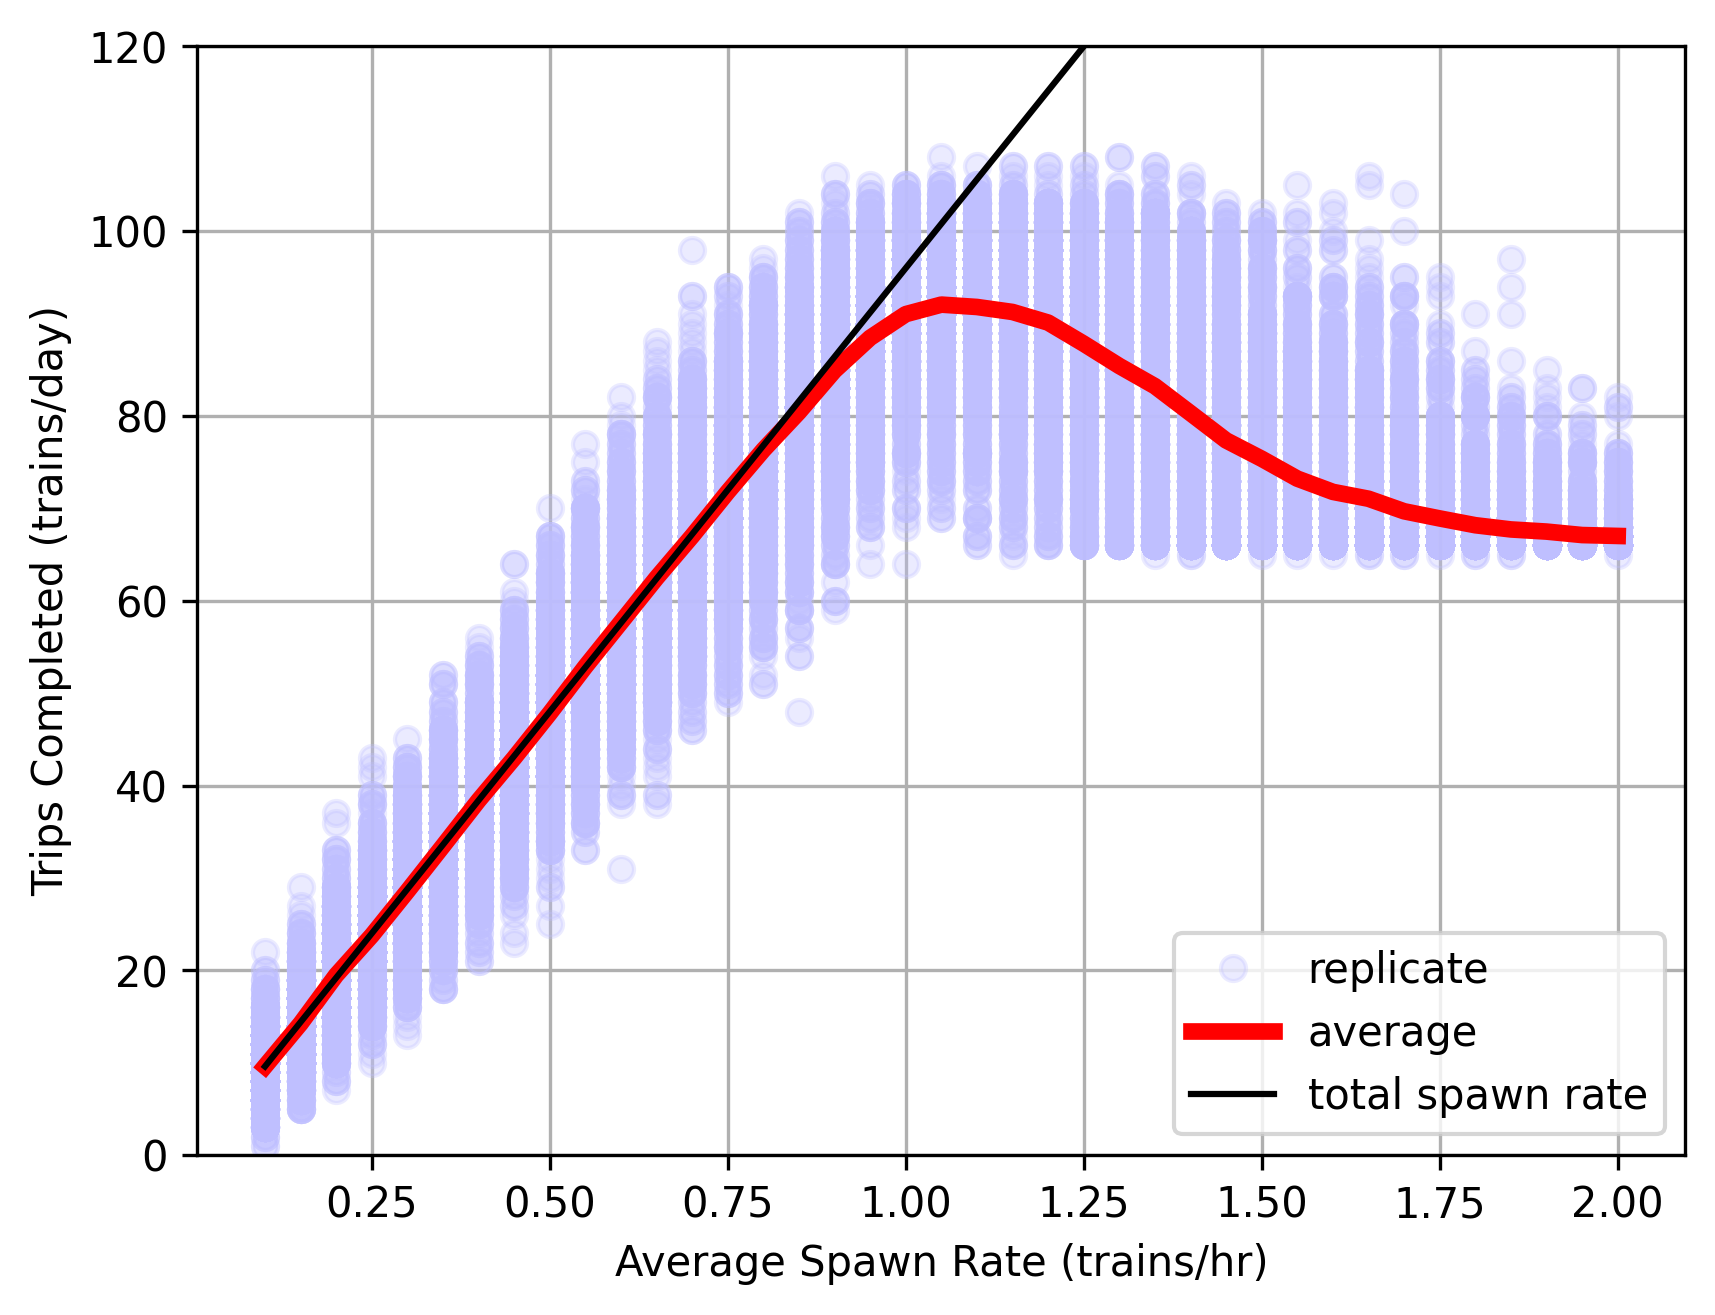

In [21]:
lmda = [0.05*(i+1) for i in range(1,n) for _ in range(1000) ]
plt.plot(lmda, df_ew['train_ctr'].to_list(), 'o', alpha=0.3, color=(0.75,0.75,1), label= 'replicate')

x_avg = [0.05*(i+1) for i in range(1,n)]
y_avg = [df_list[i]['train_ctr'].mean() for i in range(1,n)]
plt.plot(x_avg, y_avg, color= (1,0,0), linewidth= 4, label= 'average')

r_avg = [x_avg[i]*4*24 for i in range(len(x_avg))]
plt.plot(x_avg, r_avg, color=(0,0,0), label= 'total spawn rate' )

plt.grid()
plt.legend()
plt.xlabel('Average Spawn Rate (trains/hr)')
plt.ylabel('Trips Completed (trains/day)')
plt.ylim(0,120)

plt.show()

Text(0, 0.5, 'Average Speed (km/hr)')

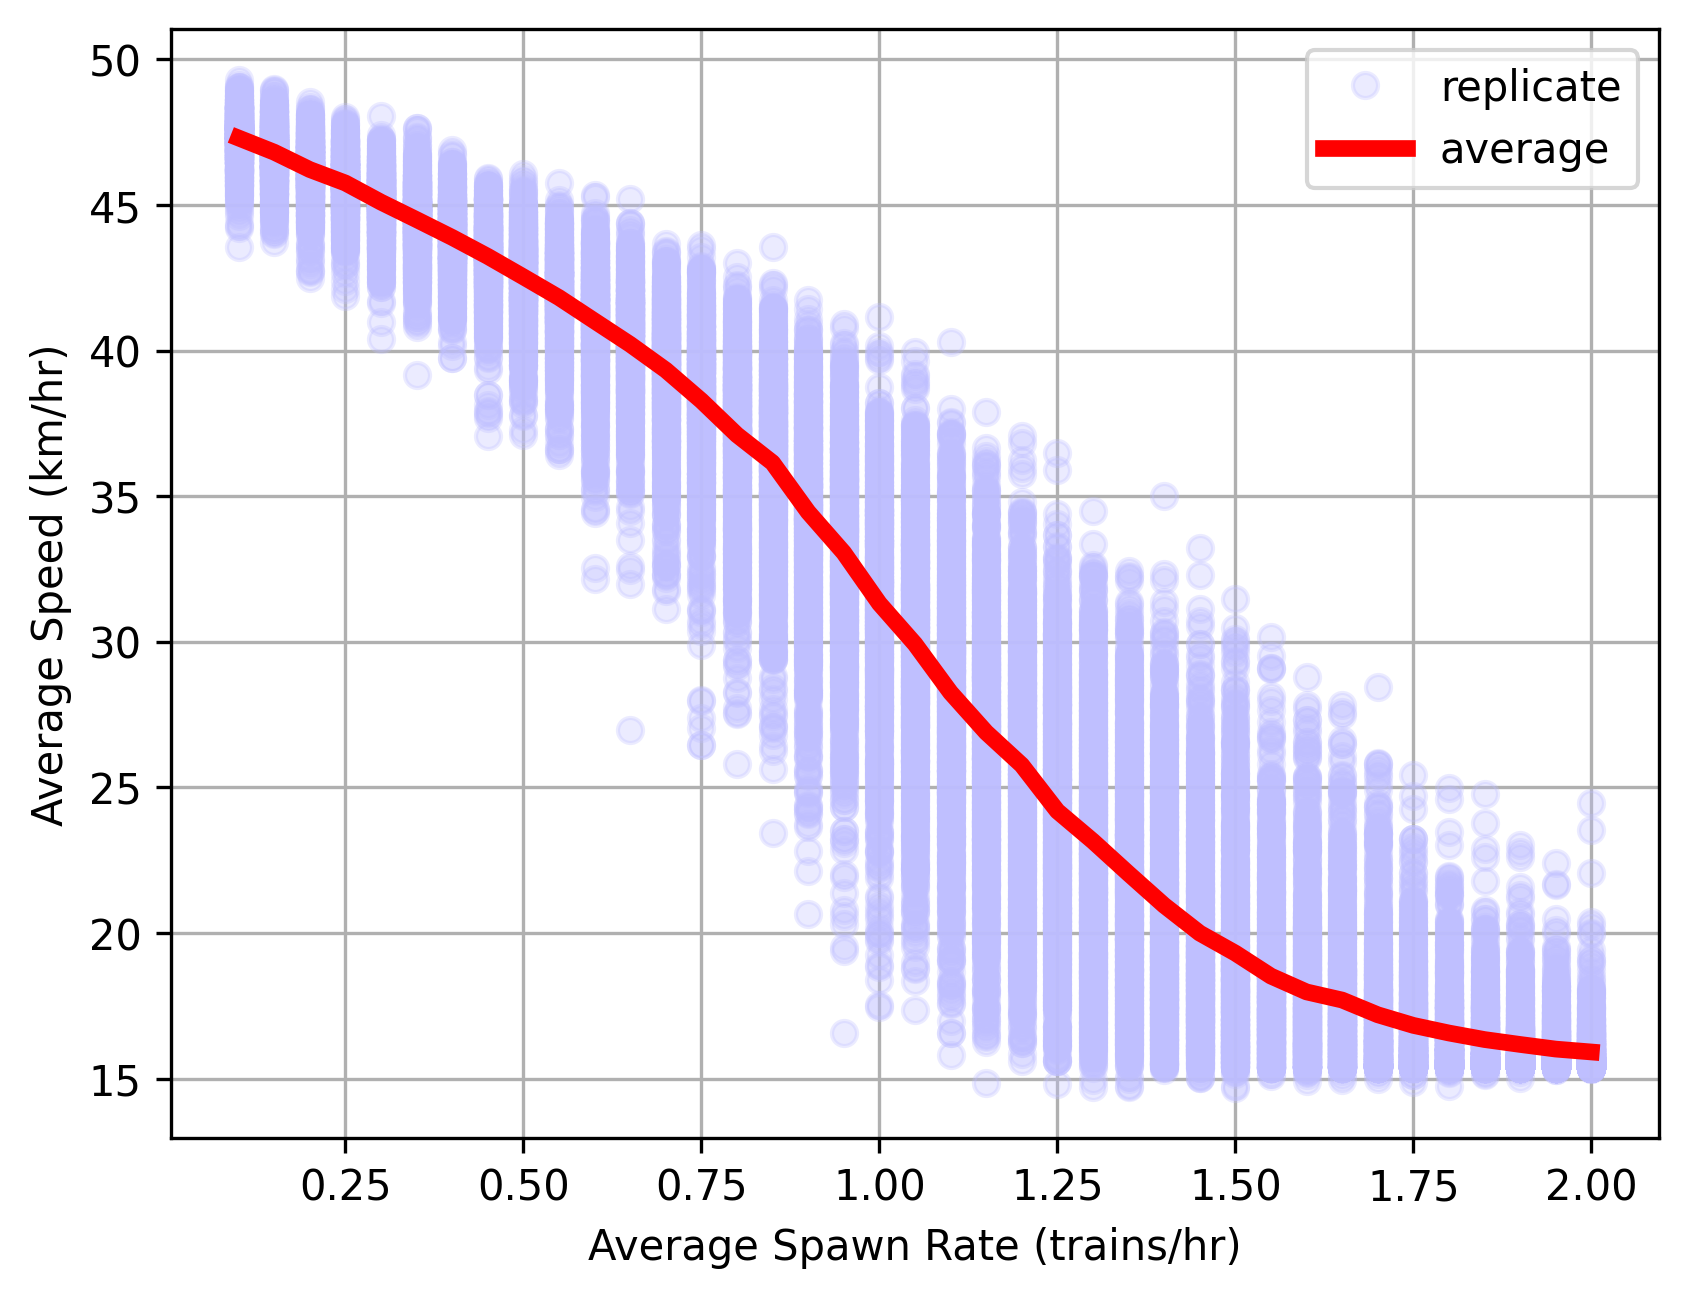

In [22]:
plt.plot(lmda, df_ew['avg_speed'].to_list(), 'o', alpha= 0.3, color= (0.75,0.75,1), label= 'replicate')

y_avg = [df_list[i]['avg_speed'].mean() for i in range(1,n)]
plt.plot(x_avg, y_avg, color= (1,0,0), linewidth= 4, label= 'average')

plt.grid()
plt.legend()
plt.xlabel('Average Spawn Rate (trains/hr)')
plt.ylabel('Average Speed (km/hr)')

Text(0, 0.5, 'Simulation Run Time (s)')

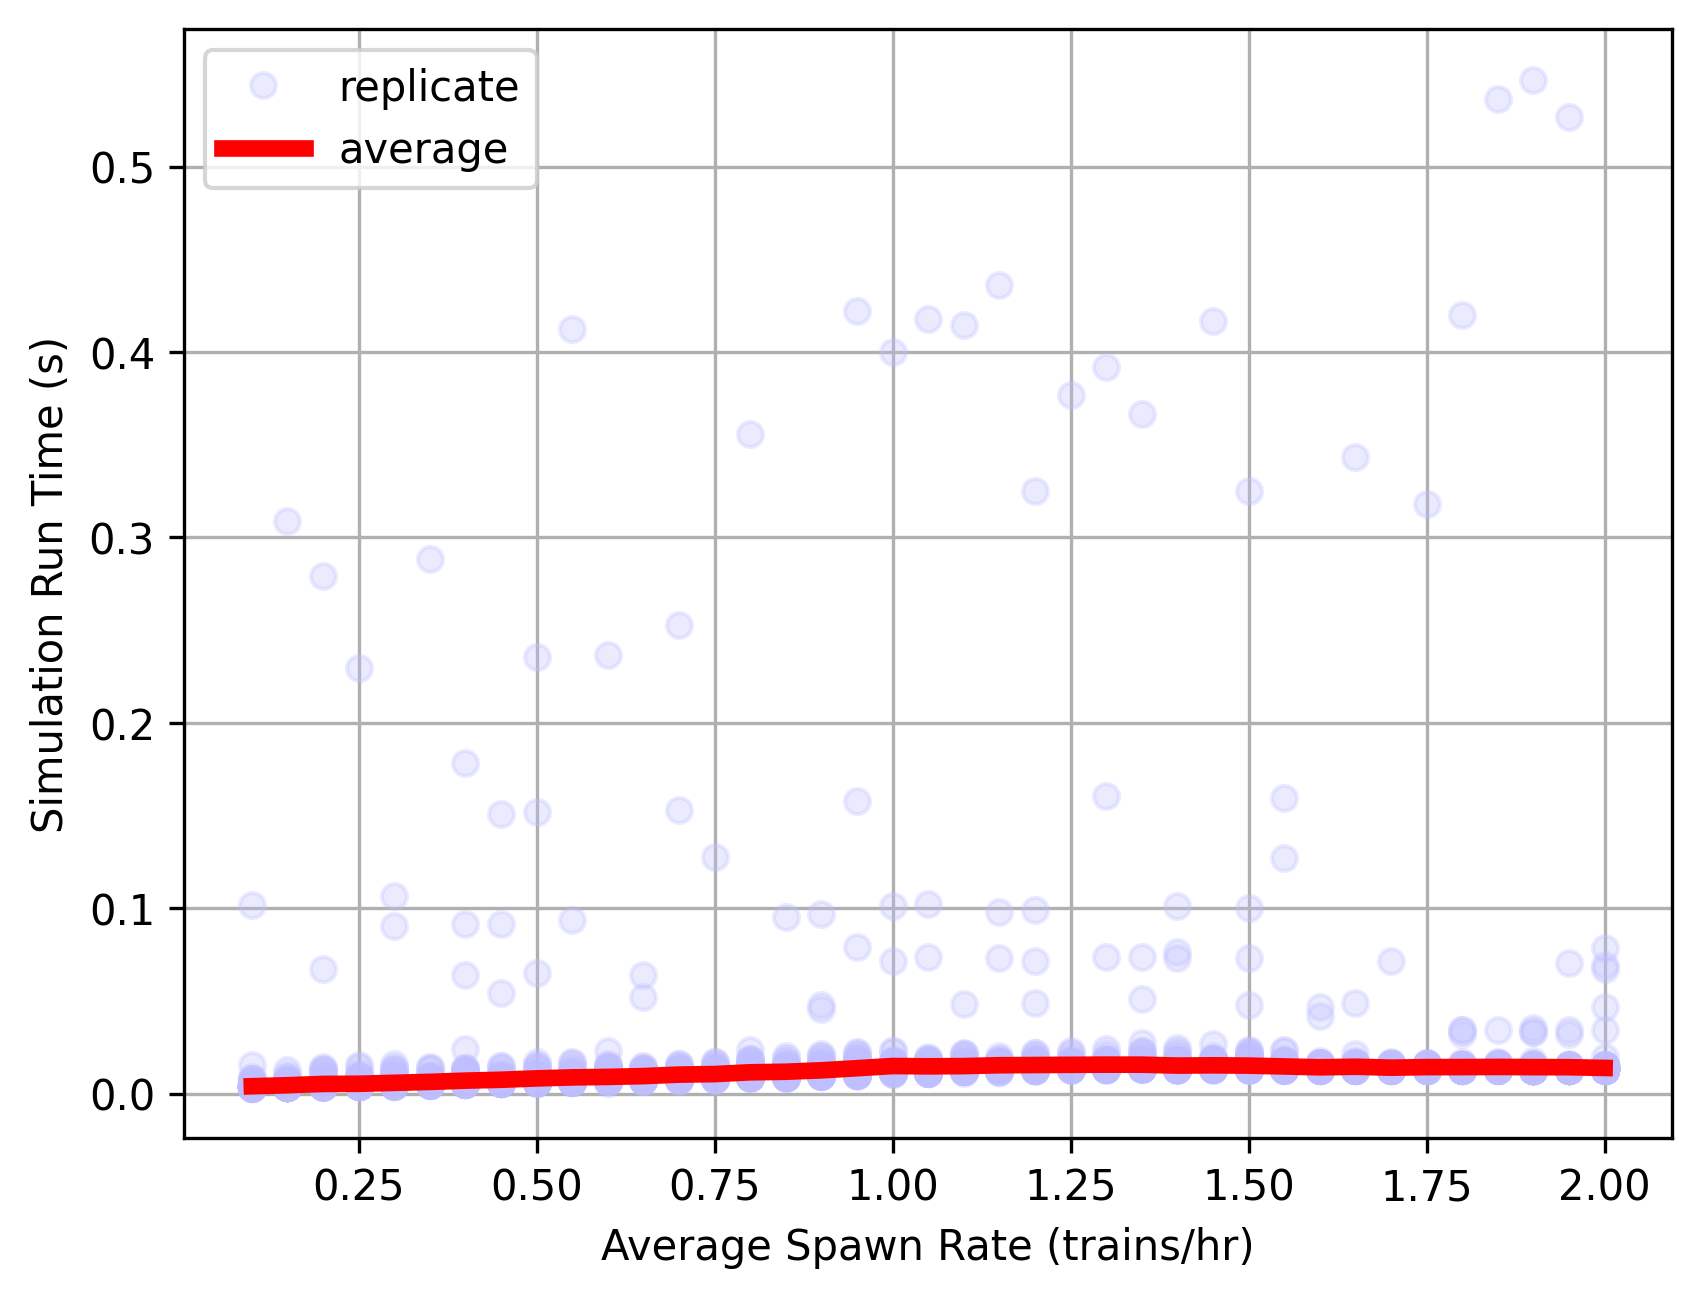

In [23]:
plt.plot(lmda, df_ew['run_t'].to_list(), 'o', alpha= 0.3, color= (0.75,0.75,1), label= 'replicate')

y_avg = [df_list[i]['run_t'].mean() for i in range(1,n)]
plt.plot(x_avg, y_avg, color= (1,0,0), linewidth= 4, label= 'average')

plt.grid()
plt.legend()
plt.xlabel('Average Spawn Rate (trains/hr)')
plt.ylabel('Simulation Run Time (s)')

In [24]:
print(y_avg[-1])

0.013945423000000002
